*Data Science Course - Telkom Digital Talent Incubator 2020*

Dinda Mareta Putriany
<br> DS0207

---

# *Multiple Linear Regression Model* Untuk Prediksi Penjualan Pie

**Analisis Regresi** adalah suatu metode analisis statistik yang digunakan untuk melihat pengaruh antara dua atau lebih banyak variabel. Variabel "pengaruh" disebut dengan bermacam-macam istilah: variabel peubah, variabel *explanatory* atau biasa disebut penduga (*predictor variable*), variabel bebas (*Independen*), variabel X. Variabel terkena akibat dikenal sebagai variabel yang dipengaruhi, variabel *respons*, variabel bergantung (*dependent*), variabel terikat, atau variabel Y. 
Kedua variabel ini dapat merupakan variabel acak (*random*), namun variabel yang dipengaruhi harus selalu variabel acak. Regresi terbagi menjadi beberapa jenis, yaitu regresi sederhana (*simple regression*) dan regresi berganda (*multiple regression*).

**Regresi berganda (*multiple regression*)** adalah model regresi atau prediksi yang melibatkan lebih dari satu variabel bebas atau prediktor. Pada code ini akan membuat multiple linear regression model dengan menggunakan data set penjualan pie beserta analisisnya.

### *Import Library*

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import math
from sklearn import linear_model
from sklearn import metrics
from mpl_toolkits import mplot3d
import scipy.stats as stats

### *Import Dataset*

Berikut merupakan *dataset* yang berisi data penjualan pie selama 15 minggu beserta atribut-atributnya.
<br>
1. **week**: Waktu penjualan pie dalam minggu. <br>
2. **pie sales**: Jumlah pie yang terjual pada minggu tersebut.<br>
3. **price**: Harga pie pada minggu tersebut.  <br>
4. **advertising**: Biaya periklanan pada minggu tersebut.

In [2]:
# Import Dataset*
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


### Korelasi Setiap Atribut

Sebelum membangun model, perlu menentukan variabel *Dependent* dan variabel *Independent* terlebih dahulu. Karena tujuan dari membangun model ini adalah untuk melakukan prediksi penjualan pie, maka atribut pie_sales merupakan *Dependent Variable*. Untuk menentukan *Independent Variable* dapat menggunakan korelasi sebagai berikut.

In [3]:
corelation = df_pie.corr()
corelation

,week,pie_sales,price,advertising
week,1.000000,-0.067887,-0.227662,-0.039217
pie_sales,-0.067887,1.000000,-0.443273,0.556320
price,-0.227662,-0.443273,1.000000,0.030438
advertising,-0.039217,0.556320,0.030438,1.000000


Dapat dilihat pada tabel di atas bahwa atribut week memiliki nilai lebih kecil dari atribut lainnya. Sehingga atribut week dianggap tidak mempengaruhi atribut pie_sales. Sedangkan atribut lainnya dianggap memiliki pengaruh pada atribut pie_sales.

### Visualisasi Data

Visualisasi dibutuhkan untuk menampilkan data dan meilhat hubungan antar variabel. Untuk menampilkan visualisasi data menggunakan *Scatter Plot* dari *Seaborn*. Terdapat 2 jenis visualisasi yaitu *2D Scatter Plot* dan *3D Scatter Plot*.  

#### *2D Scatter Plot*

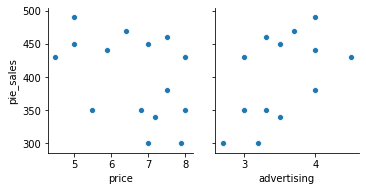

In [4]:
# Visualize the data using scatterplot
sns.pairplot(x_vars=["price","advertising"], y_vars="pie_sales", data=df_pie)

Berdasarkan visualisasi data menggunakan *scatter* di atas, terdapat kemungkinan terdapat hubungan antar atribut price dan advertising terhadap atribut pie_sales. 

#### *3D Scatter Plot*

Berikut merupakan visualisasi data pada 3D *scatter plot*.

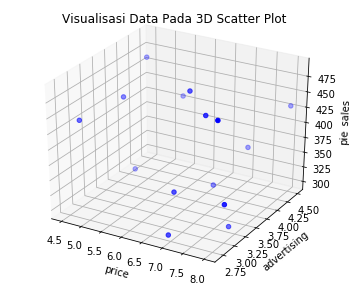

In [5]:
# Creating dataset
z = df_pie['pie_sales']; x = df_pie['price']; y = df_pie['advertising']
 
# Creating figure
fig = plt.figure(figsize = (6, 5)); ax = plt.axes(projection ="3d")
ax.set_xlabel("price"); ax.set_ylabel("advertising"); ax.set_zlabel("pie_sales")
 
# Creating plot
ax.scatter3D(x, y, z, color = "blue")
plt.title("Visualisasi Data Pada 3D Scatter Plot")
 
# show plot
plt.show()

#### Visualisasi Pengaruh Variabel X Terhadap Variabel Y

Seperti yang sudah dijelaskan sebelumnya bahwa atribut price dan advertising merupakan *Dependent Variable* (X) dan atribut pie_sales merupakan *Inependent Variable* (Y).
<br>

Untuk mengetahui pengaruh variabel X terhadap variabel Y dapat dilihat pada gambar di bawah ini.

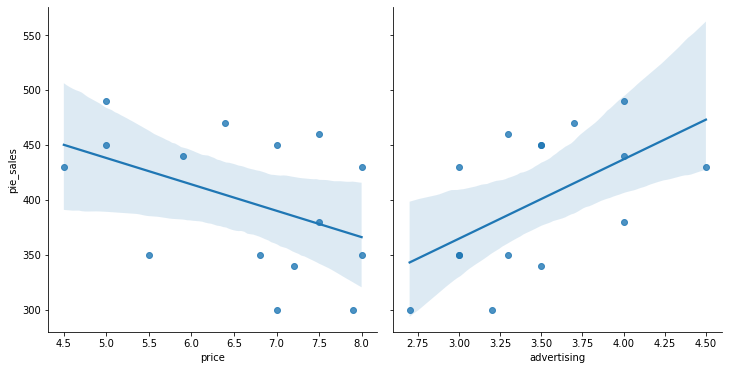

In [6]:
# Visualize the data using scatterplot
v = sns.PairGrid(x_vars=["price","advertising"], y_vars="pie_sales", data=df_pie, height=5)
v.map(sns.regplot)

Berdasarkan visualisasi gambar di atas diketahui hubungan antara variabel X terhadap atribut Y sebagai berikut.
1. Pada hubungan antara atribut **price (X)** dengan atribut **pie_sales (Y)** memiliki hubungan ***negative***, jika price semakin tinggi maka pie_sales akan turun. Hal ini berarti ketika menjual pie dengan harga yang tinggi, maka tidak banyak pie yang dijual.
2. Pada Pada hubungan antara atribut **advertising (X)** dengan atribut **pie_sales (Y)** memiliki hubungan ***positive***, jika advertising semakin tinggi maka pie_sales juga semakin tinggi. Hal ini berari ketika semakin tinggi biaya pemasangan iklan yang dikeluarkan, maka pie yang terjual semakin banyak.

## Membuat Model *Multiple Linear Regression*

Setelah mengetahui kemungkinan hubungan antar variabel, dilanjutkan dengan membuat model regresi. Model regresi di buat dengan menggunakan *Scikit Learn* dan *Statsmodels*.

### Menggunakan *Scikit Learn*

Model ini dibangun dengan menggunakan bantuan *library* yang bernama *Scikit Learn* atau biasa disebut *Sklearn*.

In [7]:
# Set independent and dependent variables
X = df_pie[['price','advertising']] # here we have 2 variables for multiple regression. 
Y = df_pie['pie_sales']

Karena merupakan model yang linear maka menggunakan fungsi *LinearRegression()*.

In [8]:
#initialize model with sklearn 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dari proses di atas menghasilkan nilai *intercept* dan *coefficients* yang dihasilkan sebagai berikut.

In [9]:
print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)

Intercept: 306.5261932837437
Coefficients: [-24.97508952  74.13095749]


***Intercept*** merupakan perkiraan nilai rata-rata dari variabel Y apabila nilai variabel X = 0. Dengan kata lain apabila X tidak memberi kontribusi, maka variabel Y akan sebesar nilai *intercept*. Secara matematis *intercept* didefinisikan sebagai suatu titik potong antara suatu garis dengan sumbu Y saat nilai X = 0. Pada model ini didapatkan nilai *intercept* sebesar 306.5261932837437.
<br>
<br>
***Coefficients*** merupakan nilai yang menggambarkan parameter model regresi yang dimiliki. *Coefficients* untuk model regresi merupakan suatu nilai rata-rata yang memiliki peluang kejadian pada variabel Y terhadap variabel X yang diberikan. Pada nodel ini memiliki 2 variabel, yaitu x1 untuk atribut price dengan nilai -24.97508952 dan x2 untuk atribut advertising dengan nilai 74.13095749.

Nilai yang telah di dapatkan akan dimasukkan ke dalam persamaan berikut.

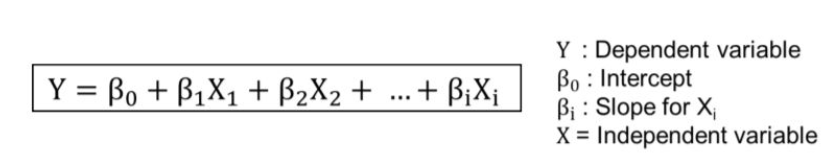

Maka, persamaan yang didapat adalah <br> <br>
**Y = 306.5261932837437 - 24.97508952(price) + 74.13095749(advertising)**
<br><br>
Sehingga, benar bahwa atribut price dengan atribut pie_sales memiliki hubungan yang negatif dan atribut advertising dengan atribut pie_sales memiliki hubungan yang positif.

Kemudian melakukan prediksi menggunakan model yang telah dibangun dengan menggunakan data baru. Misalkan data baru sebagai berikut. <br>
**price**: 5.0 <br>
**advertising**: 5.0

In [10]:
# prediksi penjualan rata-rata 
New_price = 5.0
New_advertising = 5.0
print ('Predicted Pie Sales: \n', regr.predict([[New_advertising ,New_price]]))

Predicted Pie Sales: 
 [552.30553314]


Berdasarkan hasil diatas dengan menggunakan data baru, pie yang terjual diprediksi sebanyak 552 pie.

In [11]:
# prediksi terhadap X
predict = regr.predict(X)
print(predict)

[413.79536065 363.84518161 329.11834961 440.31478584 359.08845703
 415.73685186 416.53116292 420.97016308 391.15891787 478.17457565
 386.16389997 346.44205006 455.69699508 441.10909691 331.85415188]


### Menggunakan *Statsmodels*

Model ini dibangun dengan menggunakan *Statsmodels*. Selain itu juga menampilkan ringkasan model dengan menggunakan *summary()*.

In [20]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        20:44:19   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

## Pengukuran Performansi Model

Setelah model dibangun, alangkah baiknya jika dilakukan pengujian untuk mengukur performansi model. Performansi model dapat diukur dengan menggunakan koefisien determinasi, F-test, T-test, dan uji asumsi klasik.

**MAE** ***(Mean Absolute Error)***: merepresentasikan rata–rata kesalahan *(error)* absolut antara hasil prediksi dengan nilai sebenarnya.<br>
**MSE** ***(Mean Squared Error)***: merepresentasikan rata–rata kesalahan *(error)* yang di kuadratkan antara hasil prediksi dengan nilai sebenarnya.<br>
**RMSE** ***(Root Mean Squared Error)***: merepresentasikan tingkat kesalahan berdasarkan MSE.<br>
***R-squared***: merepresentasikan tingkat ketepatan model.<br>

In [13]:
print('MAE:',metrics.mean_absolute_error(Y, predict))  
print('MSE:',metrics.mean_squared_error(Y, predict))  
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y, predict)))

MAE: 34.54567364769344
MSE: 1802.2204311503624
RMSE: 42.45256683818262


### Koefisien Determinasi (R<sup>2</sup>)

**Koefisien determinasi (R<sup>2</sup>)** adalah besarnya informasi variabel Y yang dapat diberikan oleh model. Digunakan untuk menunjukkan seberapa besar persentase variasi variabel independen (X) yang bisa menjelaskan variabel dependen (Y). Nilai R<sup>2</sup> berkisar antara 0 hingga 1. Semakin besar nilai R<sup>2</sup> maka model yang diperoleh semakin baik.

Dapat dilihat pada *statsmodels*, nilai R<sup>2</sup> adalah 0.521. Untuk lebih lengkapnya terdapat di bawah ini.

In [14]:
print('R2: ',model.rsquared)

R2:  0.521477936029229


Dari R<sup>2</sup> yang diperoleh, yaitu 0.521 maka **terdapat 52.1% variabel idependen yang bisa menjelaskan variabel dependen.**

### F-test (ANOVA)

F-Test dapat juga disebut uji simultan model regresi, yaitu pengujian untuk mengetahui apakah variabel independen (X) secara bersama-sama secara signifikan memngaruhi variabel dependen (Y). Atau setidaknya antara salah satu variabel X dengan variabel terikat Y, benar-benar terdapat hubungan linier.

Rumusan hipotesis pada pengujian ini adalah sebagai berikut. <br>
**H0** : Tidak ada pengaruh secara signifikan antara price dan advertising secara bersama-sama terhadap pie_sales. <br>
**H1** : Ada pengaruh secara signifikan antara price dan advertising secara bersama-sama terhadap pie_sales.

Tingkat signifikasi yang digunakan adalah **&alpha; = 5%** (atau 0.05 karena merupakan ukuran standar yang sering digunakan dalam penelitian).<br> <br>
Pada kasus ini terdapat 15 data dengan 2 variabel bebas, sehingga n = 15 dan k = 2. Maka, df1 (jumlah variabel) dan df2 (n-k-1) adalah **df1 = 2** dan **df2 = 12**. Berdasarkan tabel distribusi, maka nilai **F = 3.81** (lihat tabel baris ke-12).

In [16]:
print('F-statistic:', model.fvalue)
print('Peluang:', model.f_pvalue)

F-statistic: 6.538606789020474
Peluang: 0.012006372233186352


Terdapat kriteria pengujian sebagai berikut. <br>
- H0 **diterima** bila F-statistic < F tabel <br>
- H0 **ditolak** bila F-statistic > F tabel

Diketahui bahwa **F-statistic = 6.54** dan **F tabel = 3.81**, maka **F-statistic > F tabel**. Sehingga **H0 ditolak**, artinya **ada pengaruh secara signifikan** antara price dan advertising secara bersama-sama terhadap pie_sales. Selain itu, **model regresi yang diperoleh dapat digunakan.**

### T-test 

T-test juga biasa disebut dengan uji parsial. Pengujian ini digunakan untuk menguji apakah variabel X secara terpisah (parsial) masih dapat mempengaruhi variabel Y.

#### Atribut price terhadap pie_sales

Rumusan hipotesis untuk pengujian ini adalah sebagai berikut. <br>
**H0** : Tidak ada pengaruh secara parsial antara price terhadap pie_sales. <br>
**H1** : Ada pengaruh secara parsial antara price terhadap pie_sales.

Tingkat signifikasi yang digunakan adalah **&alpha; = 5%** (atau 0.05 karena merupakan ukuran standar yang sering digunakan dalam penelitian). Selanjutnya menenentukan t hitung **(t)**, berdasarkan tabel *statsmodels* diperoleh **t = -2.306**.<br>
Berikut merupakan tabel distribusi t.

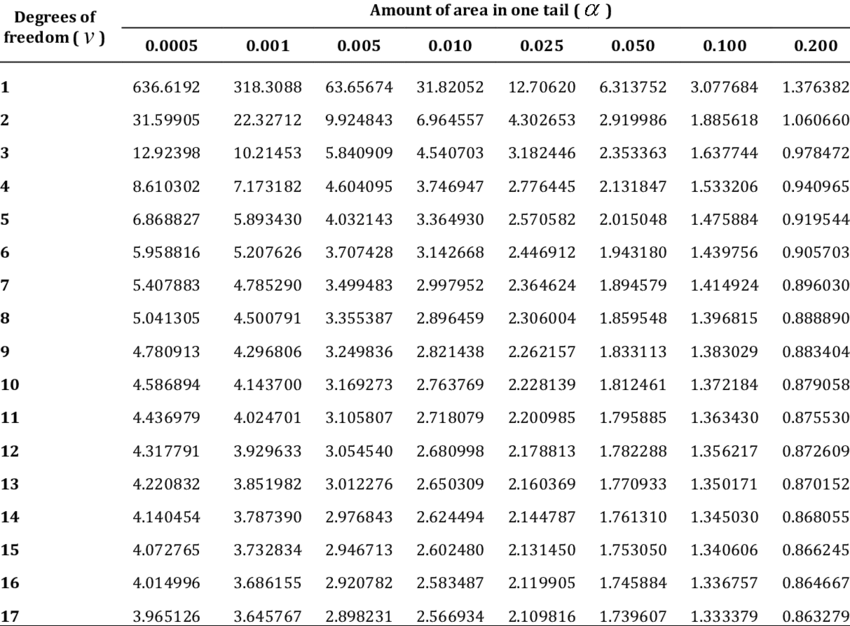

Tabel distribusi t dicari pada &alpha; = 5% / 2 = 2.5% = 0.025 (uji dua sisi). Dengan df2 = 12, maka berdasarkan tabel distribusi t, nilai **T-tabel = 2.178813** (lihat v = 12 dan &alpha; = 0.025).

Terdapat kriteria pengujian sebagai berikut. <br>
- H0 **diterima** bila - T-tabel < t < T-tabel <br>
- H0 **ditolak** bila - t < - T-tabel atau t > T-tabel

Diketahui bahwa **t = -2.306** dan **T-tabel = 2.178813**, maka **- t < - T-tabel**. Sehingga **H0 ditolak**, artinya **ada pengaruh secara parsial antara price terhadap pie_sales.**

#### Atribut advertising terhadap pie_sales

Rumusan hipotesis untuk pengujian ini adalah sebagai berikut. <br>
**H0** : Tidak ada pengaruh secara parsial antara advertising terhadap pie_sales. <br>
**H1** : Ada pengaruh secara parsial antara advertising terhadap pie_sales.

Tingkat signifikasi yang digunakan adalah **&alpha; = 5%** (atau 0.05 karena merupakan ukuran standar yang sering digunakan dalam penelitian). Selanjutnya menenentukan t hitung **(t)**, berdasarkan tabel *statsmodels* diperoleh **t = 2.855**.<br>

Berdasarkan tabel distribusi t, maka nilai **T-tabel = 2.178813**. Maka **t > T-tabel**. Sehingga **H0 ditolak**, artinya **ada pengaruh secara parsial antara advertising terhadap pie_sales.**

Jadi kesimpulan akhir yang didapatkan pada T-test adalah atribut price dan advertising sama-sama memiliki pengaruh secara parsial terhadap atribut pie_sales.

### Uji Asumsi Klasik

Uji asumsi klasik dilakukan menggunakan teknik perhitungan yang disebut Ordinary Least Square (OLS). Dengan menggunakan teknik ini diharapkan kesalahan dalam prediksi terjadi seminimal mungkin. Terdapat beberapa jenis asumsi klasik. Pada kali ini asumsi yang digunakan adalah asumsi normalitas, multikolinieritas, dan autokorelasi. <br> <br>
Pengujian asumsi klasik menggunakan data residual, kecuali untuk asumsi multikolinieritas. Residual didapatkan dari pembangunan model menggunakan *statsmodels*.

In [17]:
df_pie['pie_sales_pred'] = model.predict(X)
df_pie['residual'] = model.resid
df_pie.drop("week", axis=1).head()

,pie_sales,price,advertising,pie_sales_pred,residual
0,350,5.5,3.3,413.795361,-63.795361
1,460,7.5,3.3,363.845182,96.154818
2,350,8.0,3.0,329.118350,20.881650
3,430,8.0,4.5,440.314786,-10.314786
4,350,6.8,3.0,359.088457,-9.088457


### Normalitas

Asumsi normalitas bertujuan untuk memastikan bahwa model terdistribusi dengan normal. Pemeriksaan kenormalan dilakukan dengan menggunakan residual. Residual akan diplot dengan menggunakan QQ-Plot. Ciri-ciri dari data yang terdistribusi secara normal yaitu apabila diplot dengan menggunakan QQ-Plot titik-titik data tersebut tersebar di sekitar garis lurus.

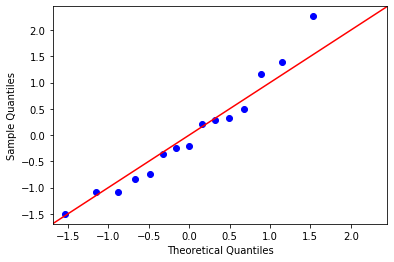

In [18]:
fig = sm.qqplot(df_pie['residual'], stats.t, fit=True, line="45")
plt.show()

Berdasarkan QQ-plot diatas didapatkan asumsi bahwa **data residual terdistribusi secara normal.**

### Multikolinieritas

Asumsi multikolinieritas bertujuan untuk menunjukkan terjadinya korelasi linier yang erat pada variabel independen. Dengan kata lain menunjukkan korelasi variabel independen dengan variabel dependen. Selain itu juga untuk menunjukkan bahwa variabel independen tidak memengaruhi satu sama lain, sehingga asumsi ini cocok untuk model *multiple linear regression*.

In [19]:
m = df_pie[['pie_sales', 'price', 'advertising']]
m.corr()

,pie_sales,price,advertising
pie_sales,1.000000,-0.443273,0.556320
price,-0.443273,1.000000,0.030438
advertising,0.556320,0.030438,1.000000


Dapat dilihat pada tabel di atas bahwa atribut price memiliki korelasi negatif dengan pie_sales dan atribut advertising memiliki korelasi positif. Hal ini sesuai dengan hasil yang sebelumnya di dapatkan. Kedua atribut independen memiliki nilai korelasi mendekati 0. Hal ini menunjukkan bahwa **kedua variabel independen memiliki korelasi linier yang erat dan tidak saling memengaruhi satu sama lain.**

### Autokorelasi

Autokorelasi dilakukan untuk mengetahui adanya korelasi variabel di dalam model dengan perubahan waktu. Uji autokorelasi pada model regresi linier harus dilakukan apabila data merupakan data truntut waktu, karena nilai pada sampel tertentu sangat dipengaruhi oleh nilai sampel sebelumnya. Statistik uji yang sering dipakai adalah *Durbin-Watson statistics* (DW-statistics). *DW-statistic* menilai autokorelasi pada residual yang akan membandingkan 2 nilai DW Tabel, yaitu Durbin Upper (DU) dan Durbin Lower (DL). 

Hipotesis yang sering dilakukan pada pengujian autokorelasi adalah sebagai berikut.<br>
**H0** : Tidak ada autokorelasi residual.
**H1** : Ada autokorelasi residual.

Cara menentulan pengujian autokorelasi berdasarkan nilai DW adalah sebagai berikut.

- Jika DW < DL maka tolak H0 dan terdapat autokorelasi positif
- jika DW > 4–DL maka tolak H0 dan terdapat autokorelasi negatif
- Jika DW > DU maka terima H0 dan tidak terdapat autokorelasi positif
- Jika DU < DW < 4–DU , maka terima H0 dan tidak terdapat autokorelasi positif maupun negatif
- Jika DL ≤ DW ≤ DU atau 4−DU ≤ DW ≤ 4−DL maka pengujian tidak meyakinkan atau tidak dapat disimpulkan.


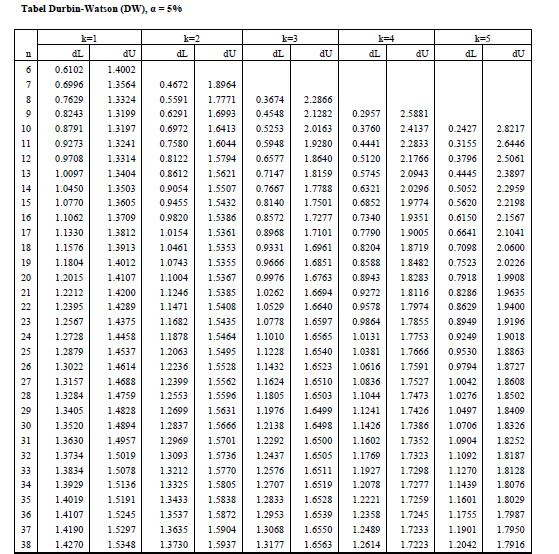

Diketahui bahwa n = 15 dan k = 2. Maka, pada *summary statsmodels* nilai *Durbin Watson* adalah **DW = 1.683** 

Berdasarkan tabel di atas, didapatkan nilai sebagai berikut <br>
**DL = 0.9455**<br>
**DU = 1.5432**<br>
**4-DU = 2.4568**<br>
**4-DL = 3.0545**<br><br>

Didapat bahwa **DW > DU** dan **DU < DW < 4–DU** maka **H0 diterima** yang berarti **tidak terjadi autokorelasi pada data residual.**

### Kesimpulan

Dapat disimpulkan bahwa model yang dibangun dapat melewati seluruh pengujian yang dilakukan. Walaupun nilai prediksi yang diperoleh hanya 52.1%, model telah memenuhi syarat-syarat dalam pengujian lain, hal ini berarti terdapat sekitar 47.9% dipengaruhi atribut lain yang tidak dimasukkan ke dalam model. Sehingga dapat dikatakan model yang dibangun memiliki performansi dan dapat bekerja dengan baik untuk memprediksi penjualan pie hanya dengan dua atribut. Selain itu juga dapat diketahui bahwa atribut yang memengaruhi banyaknya penjualan pie adalah atribut price dan atribut advertising sebagai variabel independen. Pengaruh yang dimiliki dapat secara signifikan maupun parsial terhadap variabel dependen dan tidak saling memengaruhi satu sama lain antar variabel independen.


## Referensi 

https://ineddeni.files.wordpress.com/2008/07/regresi_linier.pdf <br>
http://duwiconsultant.blogspot.com/2011/11/analisis-regresi-linier-berganda.html#:~:text=Adjusted%20R%20Square%20adalah%20nilai,R2%20sebagai%20koefisien%20determinasi <br>
http://duwiconsultant.blogspot.com/2011/11/uji-autokorelasi.html